# SLR and MLR on Real Estate Dataset

## Nakul Ramesh Varma - 21BDA35

### Import Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style = "darkgrid")
sns.set(rc = {'figure.figsize':(11.7,8.27)})

### Read Data

In [2]:
df = pd.read_csv("Real estate.csv", index_col=0)

In [3]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)

## Simple Linear Regression

### Split data to X and y

In [5]:
X = df['X3 distance to the nearest MRT station']
y = df['Y house price of unit area']

In [6]:
model = linear_model.LinearRegression()

In [7]:
model.fit(np.array(X).reshape(-1,1),y)

LinearRegression()

In [8]:
model.intercept_

45.851427057774984

In [9]:
model.coef_

array([-0.00726205])

In [10]:
model.score(np.array(X).reshape(-1,1),y)

0.45375427891826703

### To Check assumptions of LR

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

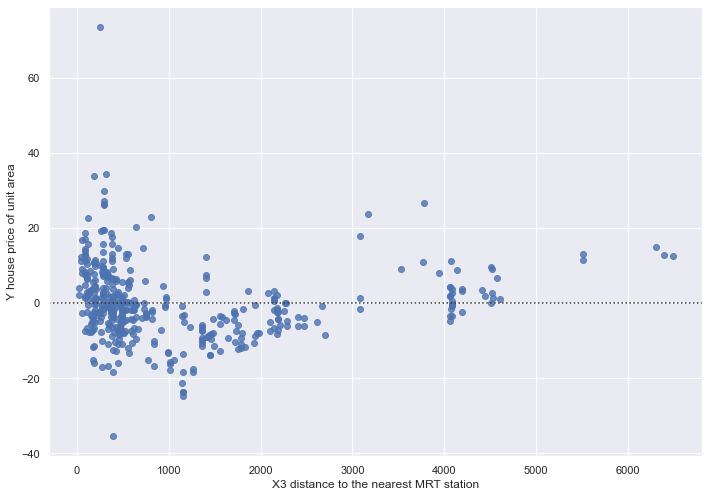

In [11]:
sns.residplot(x = "X3 distance to the nearest MRT station",y = "Y house price of unit area",data = df)

## Statsmodel API

In [12]:
model = sm.OLS(y,np.array(X).reshape(-1,1))

In [13]:
results = model.fit()

In [14]:
print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.195
Model:                                    OLS   Adj. R-squared (uncentered):              0.193
Method:                         Least Squares   F-statistic:                              100.1
Date:                        Fri, 29 Apr 2022   Prob (F-statistic):                    2.97e-21
Time:                                21:01:49   Log-Likelihood:                         -2073.2
No. Observations:                         414   AIC:                                      4148.
Df Residuals:                             413   BIC:                                      4152.
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                 coef    std err        

## Multiple Linear Regression

In [15]:
X = pd.get_dummies(df, columns=['X1 transaction date'], drop_first=True)
X=X.drop(['Y house price of unit area'], axis=1)
y=df['Y house price of unit area']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
model = linear_model.LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
model.intercept_

822.2989110545794

In [20]:
model.coef_

array([-2.47373373e-01, -4.99444557e-03,  1.10351064e+00,  2.50344724e+02,
       -5.78592862e+01,  2.82332322e+00])

In [21]:
model.score(X_train, y_train)

0.58061522096528

In [22]:
model.score(X_train, model.predict(X_train))

1.0

In [23]:
model.score(X_test, y_test)

0.5703957830624946

### To Check assumptions of LR

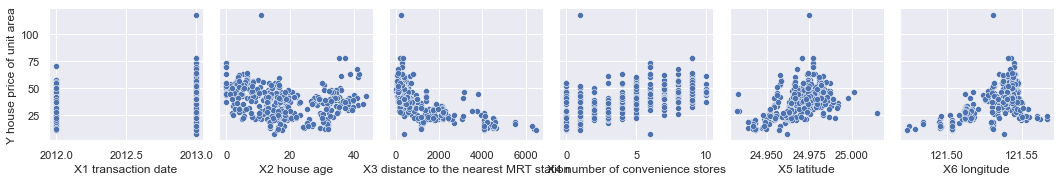

In [24]:
sns.pairplot(df,x_vars=["X1 transaction date","X2 house age",'X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude',], y_vars='Y house price of unit area')

## Statsmodel API

In [25]:
model = sm.OLS(y_train,X_train).fit()

In [26]:
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.952
Model:                                    OLS   Adj. R-squared (uncentered):              0.951
Method:                         Least Squares   F-statistic:                              933.0
Date:                        Fri, 29 Apr 2022   Prob (F-statistic):                   3.30e-183
Time:                                21:01:50   Log-Likelihood:                         -1043.9
No. Observations:                         289   AIC:                                      2100.
Df Residuals:                             283   BIC:                                      2122.
Df Model:                                   6                                                  
Covariance Type:                    nonrobust                                                  
                                        

In [27]:
print("Parameters: ", model.params)
print("R2: ", model.rsquared)

Parameters:  X2 house age                               -0.247182
X3 distance to the nearest MRT station     -0.004921
X4 number of convenience stores             1.104390
X5 latitude                               251.767200
X6 longitude                              -51.386164
X1 transaction date_2013                    2.814351
dtype: float64
R2:  0.9518779242382591
